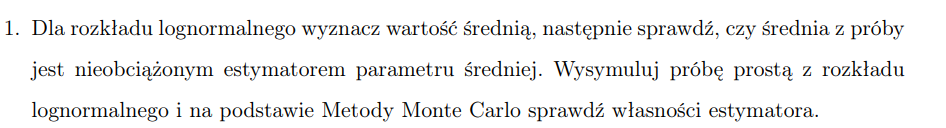

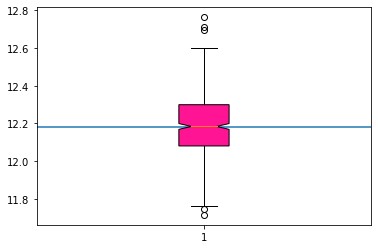

12.184965451835277 12.182493960703473
0.026958282751584173 0.025501563439015853


In [4]:
import numpy as np
import matplotlib.pyplot as plt

μ=2
σ=1
n=10000


x = np.random.lognormal(μ,σ,n)
avr=[np.mean(np.random.lognormal(μ,σ,n)) for i in range(0,500)]

bp = plt.boxplot(avr, vert=True, notch=True, patch_artist= True,boxprops=dict(facecolor="deeppink"))


avr_avr=np.mean(avr) #średnia próbkowa, średnia ze średniej avr
var_avr = np.var(avr) #próbkowa wariancja

avr_sr=np.exp(μ+((σ**2)/2)) #srednia teoretyczna ze ze wzoru 
plt.hlines(y=avr_sr,xmin=0.5,xmax=1.5)
plt.show()
var_sr=(1/n)*(np.exp(2*μ+2*(σ**2))-np.exp(2*μ+σ**2)) #wariancja teoretyczna


print(avr_avr,avr_sr)
print(var_avr,var_sr)




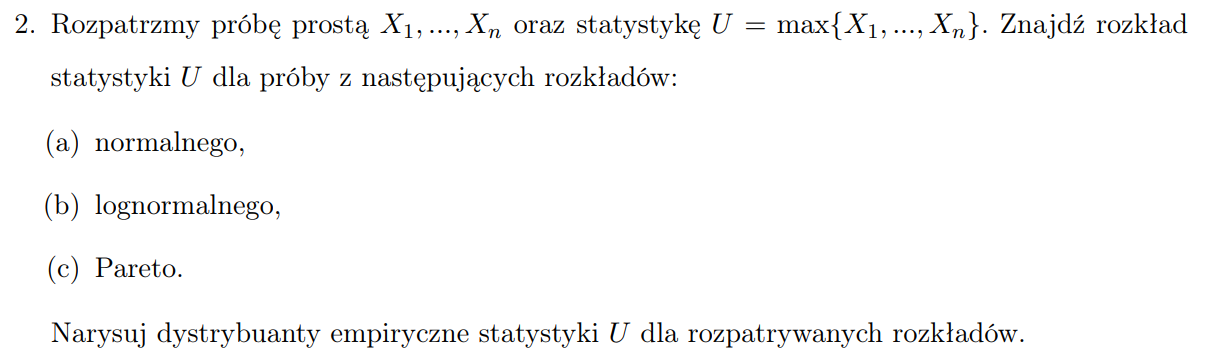

$F_U(u)=P(U\leq u)=P(\text{max}(X_1,\ldots ,X_n)\leq u)$
$=P(X_1\leq u,\ldots ,X_n\leq u)=(P(X_1\leq u)^n=(F_{X_1}(u))^n$

  Rozkład normalny

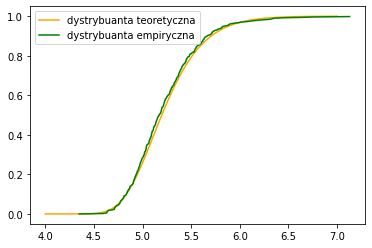

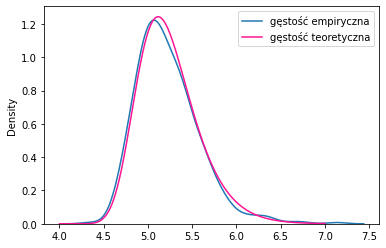

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

#A
n, m, μ, σ = 1000, 500, 2, 1
U = np.array([np.amax(np.random.normal(μ,σ,n)) for _ in range(m)])

x_e = np.sort(U) 
y_e = np.arange(len(x_e))/float(len(x_e)) #dystrybuanta empiryczna

x=np.linspace(4,7, num=1000)
F=(st.norm.cdf(x, μ, σ))**n #dystrybuanta teoretyczna

f=n*(st.norm.cdf(x, μ, σ))**(n-1)*(st.norm.pdf(x, μ, σ)) #gęstość teoretyczna


plt.plot(x,F, label="dystrybuanta teoretyczna", color="orange")
plt.plot(x_e, y_e,label="dystrybuanta empiryczna", color="g")
plt.legend()
plt.show()

sns.kdeplot(U, label="gęstość empiryczna") #gęstość empiryczna
#sns.histplot(U, kde=True, label='gęstość empiryczna', stat="density")
plt.plot(x, f,label="gęstość teoretyczna", color='deeppink')
plt.legend()

In [ ]:
Rozkład lognormlany

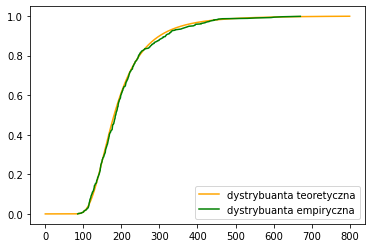

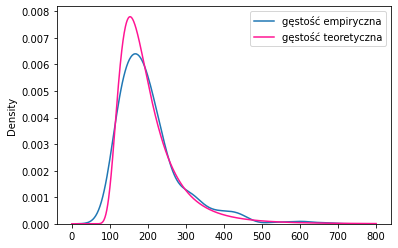

In [30]:

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

#A
n, m, μ, σ = 1000, 500, 2, 1
U = np.array([np.amax(np.random.lognormal(μ,σ,n)) for _ in range(m)])

x_e = np.sort(U) 
y_e = np.arange(len(x_e))/float(len(x_e)) #dystrybuanta empiryczna

x=np.linspace(0,800, num=1000)
F=(st.lognorm.cdf(x, scale=np.exp(μ), s=σ))**n #dystrybuanta teoretyczna

f=n*(st.lognorm.cdf(x, scale=np.exp(μ), s=σ))**(n-1)*(st.lognorm.pdf(x, scale=np.exp(μ), s=σ))


plt.plot(x,F, label="dystrybuanta teoretyczna", color="orange")
plt.plot(x_e, y_e,label="dystrybuanta empiryczna", color="g")
plt.legend()
plt.show()

sns.kdeplot(U, label="gęstość empiryczna")
#sns.histplot(U, kde=True, label='gęstość empiryczna', stat="density")
plt.plot(x, f,label="gęstość teoretyczna", color='deeppink')

plt.legend()

pareto

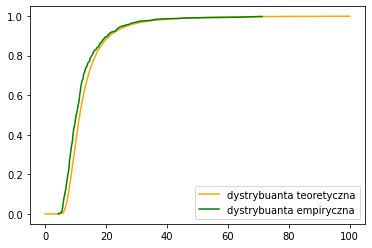

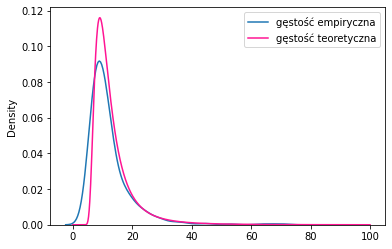

In [10]:

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

#A
n, m,k = 1000, 500, 3
U = np.array([np.amax(np.random.pareto(k,n)) for _ in range(m)])

x_e = np.sort(U) 
y_e = np.arange(len(x_e))/float(len(x_e)) #dystrybuanta empiryczna

x=np.linspace(0,100, num=1000)
F=(st.pareto.cdf(x,k))**n #dystrybuanta teoretyczna

f=n*(st.pareto.cdf(x,k))**(n-1)*(st.pareto.pdf(x,k))


plt.plot(x,F, label="dystrybuanta teoretyczna", color="orange")
plt.plot(x_e, y_e,label="dystrybuanta empiryczna", color="g")
plt.legend()
plt.show()

sns.kdeplot(U, label="gęstość empiryczna")
#sns.histplot(U, kde=True, label='gęstość empiryczna', stat="density")
plt.plot(x, f,label="gęstość teoretyczna", color='deeppink')

plt.legend()

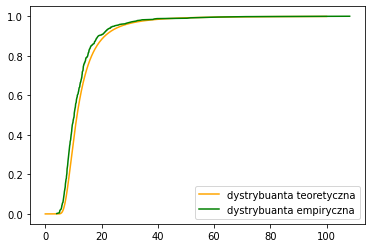

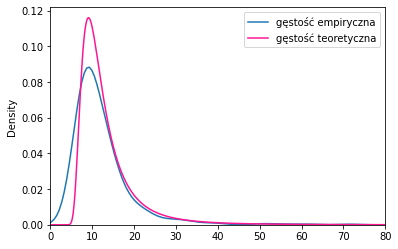

In [6]:
from statsmodels.distributions.empirical_distribution import ECDF

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns


#A
n, m, k = 1000, 500, 3
U = np.array([np.amax(np.random.pareto(k, n)) for _ in range(m)])

x_e = np.sort(U) 
y_e = np.arange(len(x_e))/float(len(x_e)) #dystrybuanta empiryczna

x=np.linspace(0,100, num=500)
F=(st.pareto.cdf(x, k))**n #dystrybuanta teoretyczna

f=n*(st.pareto.cdf(x, k))**(n-1)*(st.pareto.pdf(x, k))


plt.plot(x,F, label="dystrybuanta teoretyczna", color="orange")
plt.plot(ECDF(U).x, ECDF(U).y,label="dystrybuanta empiryczna", color="g")
plt.legend()
plt.show()

sns.kdeplot(U, label="gęstość empiryczna")
#sns.histplot(U, kde=True, label='gęstość empiryczna', stat="density")
plt.plot(x, f,label="gęstość teoretyczna", color='deeppink')
plt.xlim(0,80)
plt.legend()

Zadanie 6

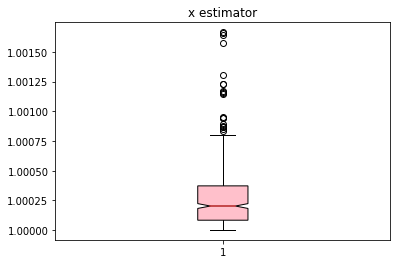

Text(0.5, 1.0, 'α estimator')

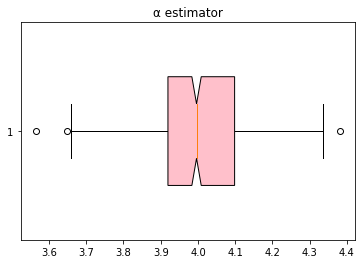

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

n=1000
alpha=4
x0=1

u=np.random.rand(n)
x=x0/(u)**(1/alpha)

def estymator(x,n):
    x0=min(x)
    alpha=-n/(n*np.log(x0)-np.sum(np.log(x)))
    return x0, alpha

results_x=[]
results_alpha=[]
for _ in range(500):
    u=np.random.rand(n)
    x=x0/(u)**(1/alpha)
    e=estymator(x,n)
    results_x.append(e[0])
    results_alpha.append(e[1])
    
plt.boxplot(results_x, vert=True, notch=True, patch_artist= True,boxprops=dict(facecolor="pink"), medianprops = dict( linewidth=1.5, color='firebrick'))
plt.title("x estimator")
plt.show()
plt.boxplot(results_alpha, vert=False, notch=True, patch_artist= True,boxprops=dict(facecolor="pink"),widths=0.5)
plt.title("α estimator")

Zadanie 7b

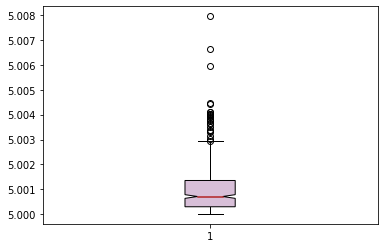

In [12]:
import numpy as np

n=1000
θ=5

def gen(θ,n):
    u=np.random.rand(n)
    x=θ-np.log(1-u)
    return x


theta=[]
for i in range(500):
    x=gen(θ,n)
    theta.append(min(x))
    
    
plt.boxplot(theta, vert=True, notch=True, patch_artist= True,boxprops=dict(facecolor="thistle"), medianprops = dict( linewidth=1.5, color='firebrick'))
plt.show()
    

Zadanie 10c

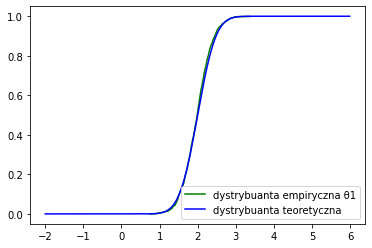

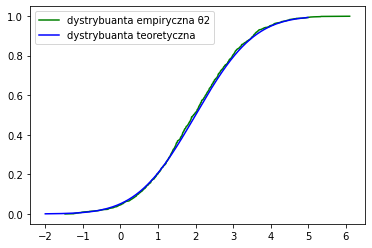

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
from scipy.stats import norm

μ=2
var=1
n=1000

theta1=[]
theta2=[]

for i in range(n):
    x=np.random.normal(μ,var,7)
    θ1=np.sum(x)/7
    θ2=(2*x[0]-x[5]+x[3])/2
    theta1.append(θ1)
    theta2.append(θ2)
    
#plt.boxplot(theta1, vert=True, notch=True, patch_artist= True,boxprops=dict(facecolor="thistle"), medianprops = dict( linewidth=1.5, color='firebrick'))
#plt.show()

#plt.boxplot(theta2, vert=True, notch=True, patch_artist= True,boxprops=dict(facecolor="skyblue"), medianprops = dict( linewidth=1.5, color='firebrick'))
#plt.show()

x_e = np.sort(theta1) 
y_e = np.arange(len(x_e))/float(len(x_e))
plt.plot(x_e, y_e,label="dystrybuanta empiryczna θ1", color="g")

x=np.arange(-2,6,0.01)
F=(st.norm.cdf(x, μ, np.sqrt(1/7)))
plt.plot(x,F, label="dystrybuanta teoretyczna", color="b")
plt.legend()
plt.show()




x_e2 = np.sort(theta2) 
y_e2 = np.arange(len(x_e2))/float(len(x_e2))
plt.plot(x_e2, y_e2,label="dystrybuanta empiryczna θ2", color="g")
x=np.arange(-2,5,0.01)

F=(st.norm.cdf(x, μ, np.sqrt(3/2*var)))
plt.plot(x,F, label="dystrybuanta teoretyczna", color="b")
plt.legend()
plt.show()

Zadanie 8

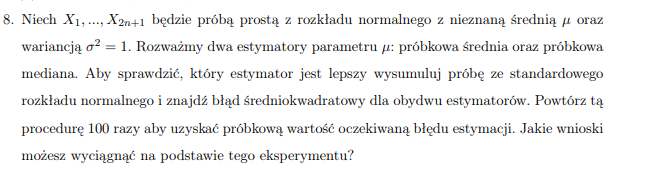
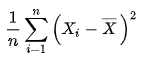

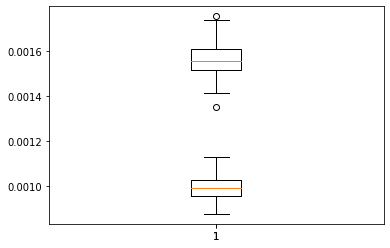

In [12]:
import statistics as st
μ=5
σ=1
n=1000
MSE1=np.array([])
MSE2=np.array([])

for _ in range(100):
    theta1=np.array([])
    theta2=np.array([])

    for i in range(n):
        x=np.random.normal(μ,σ,1001)
        θ1=np.mean(x)
        θ2=st.median(x)
        theta1=np.append(theta1,θ1)
        theta2=np.append(theta2,θ2)

    MSE1=np.append(MSE1,np.sum((μ-theta1)**2/n))
    MSE2=np.append(MSE2,np.sum((μ-theta2)**2/n))
    
plt.boxplot(MSE1)
plt.boxplot(MSE2)
plt.show()
